# Python for Analytics

This tutorial will introudce the basics of using Python for analytics, covering the following topics.

1. Python packages
2. Import data
    - `.csv` data file
    - `.jpeg` image file
3. Pre-processing data
4. Data analysis examples
    - Summary statistics
    - Text analysis: Wordcloud and Wordcount
5. Export data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuxiaoLuo/AI_Intro/blob/main/python_analytics.ipynb)

## Import Python packages

1. Two approaches to import
    1. `import datetime`
    2. `from datetime import datetime, date`
    
2. Short names can be optionally assigned arbitrary
    1. `import datetime as dt` 
    
3. Handled by the Python datetime module, which provides datetime

4. Two useful methods for dates
    1. The `strftime` method converts a datetime as string
    2. Strings can be converted (parsed) into datetime objects with `strptime` and the corresponding format.
    
Note: When you import the `datetime` library without specifiying objects, you need to type datetime twice to use the `strptime` method, such as `datetime.datetime.strptime()`.

In [1]:
# import library
import datetime

# convert string to datetime object
time1 = datetime.datetime.strptime('2026-02-05', '%Y-%m-%d')
print(time1)
print(type(time1))

2026-02-05 00:00:00
<class 'datetime.datetime'>


In [2]:
import datetime

# convert datetime object to string
string1 = datetime.datetime.strftime(time1, '%Y-%m-%d')
print(string1)
print(type(string1))

2026-02-05
<class 'str'>


In [3]:
# import the library and specify objects
from datetime import datetime

# convert datetime object to string
string2 = datetime.strftime(time1,'%b/%d/%Y')
print(string2)
print(type(string2))

Feb/05/2026
<class 'str'>


In [4]:
print(
    f'''The current time is 
    {datetime.now()} 
    and 
    the object type is 
    {type(datetime.now())}''')

# conert datetime object to string
datetime.now().strftime('%D')

The current time is 
    2026-02-05 08:25:02.396908 
    and 
    the object type is 
    <class 'datetime.datetime'>


'02/05/26'

In [5]:
from datetime import datetime
from zoneinfo import ZoneInfo

now_central = datetime.now(ZoneInfo("America/Chicago"))
print(now_central)

2026-02-05 08:25:08.340038-06:00


## Import data

### `.csv` data/files

1. CSVs separate data columns with commas.
2. Tab-separated values (TSV) data, sometimes gets classified with CSVs.
    1. TSVs differ only in that they separate data columns with tabs and not commas.
    2. The files themselves usually have a .tsv extension, but sometimes have a .csv extension.
    3. Essentially, .tsv and .csv files will act the same in Python.

Note: If the file has a .tsv file extension, then it’s likely TSV data. If the file has a .csv file extension, it’s probably CSV data, but it could be TSV data. Make sure to open and view your file so you know what you’re dealing with before you begin importing your data.


Let's do it:
- Download the [week4_Thu_PythonAnalytics_review data example.csv](https://github.com/YuxiaoLuo/AI_Intro/blob/main/data/week4_Thu_PythonAnalytics_review%20data%20example.csv) to your local computer 
- You should know what folder contains the data
- use `read_csv`

In [96]:
# import local dataset
import pandas as pd

# `week4_Thu_PythonAnalytics_review data example` locates in the `data` folder on my laptop
review =pd.read_csv('data/week4_Thu_PythonAnalytics_review data example.csv')
print(review.head())

  ReviewID        Date  ElapsedDays  Rating                      Title  \
0    r0001   1/12/2020         1714       5                    Awesome   
1    r0002  11/27/2019         1760       5                rad jacket.   
2    r0003    6/2/2019         1938       5  A fit that's hard to find   
3    r0004   1/17/2019         2074       5            awesome jacket!   
4    r0005  11/17/2019         1770       3                    yeahhuh   

                                          ReviewText  Length Sentiment  Votes  \
0  The color is a tad greener(turquoise) than it ...      69  positive      0   
1  Awesome winter jacket. Perfect for a wintery d...      18  positive      0   
2  I am 5'11" and have a pretty solid, athletic b...     122  positive      0   
3  this is my new fav jacket. it fits true to siz...      61  positive      2   
4  i'm a small person, a very small person, about...      76  negative      0   

   Helpful  SalesUp  ReturnsUp       Image  
0        0        0    

In [42]:
# import online dataset
import pandas as pd

# this is the URL to the dataset stored on GitHub folder
url = "https://raw.githubusercontent.com/YuxiaoLuo/AI_Intro/refs/heads/main/data/week4_Thu_PythonAnalytics_review%20data%20example.csv"

# load online dataset with URL
review = pd.read_csv(url)
print(review.head())

  ReviewID        Date  ElapsedDays  Rating                      Title  \
0    r0001   1/12/2020         1714       5                    Awesome   
1    r0002  11/27/2019         1760       5                rad jacket.   
2    r0003    6/2/2019         1938       5  A fit that's hard to find   
3    r0004   1/17/2019         2074       5            awesome jacket!   
4    r0005  11/17/2019         1770       3                    yeahhuh   

                                          ReviewText  Length Sentiment  Votes  \
0  The color is a tad greener(turquoise) than it ...      69  positive      0   
1  Awesome winter jacket. Perfect for a wintery d...      18  positive      0   
2  I am 5'11" and have a pretty solid, athletic b...     122  positive      0   
3  this is my new fav jacket. it fits true to siz...      61  positive      2   
4  i'm a small person, a very small person, about...      76  negative      0   

   Helpful  SalesUp  ReturnsUp       Image  
0        0        0    

In [26]:
# check dimension of the dataframe
review.shape

(100, 13)

#### Extract column

- You can extract a column from a DataFrame using:

    - Dot notation (`df.column_name`)
    - Bracket notation (`df["column_name"]`)
    - `iloc` or `loc` indexing

In [4]:
# extract review titles
review['Title']

0                                Awesome
1                            rad jacket.
2              A fit that's hard to find
3                        awesome jacket!
4                                yeahhuh
                     ...                
95                  Prefer old Gamma AR.
96                        Way too short!
97                      Not what I hoped
98                    No complaints here
99    Great jacket, but the color is off
Name: Title, Length: 100, dtype: object

In [5]:
# extract review titles
review.Title

0                                Awesome
1                            rad jacket.
2              A fit that's hard to find
3                        awesome jacket!
4                                yeahhuh
                     ...                
95                  Prefer old Gamma AR.
96                        Way too short!
97                      Not what I hoped
98                    No complaints here
99    Great jacket, but the color is off
Name: Title, Length: 100, dtype: object

In [7]:
# use iloc to extract Titles
review.iloc[:,4]

0                                Awesome
1                            rad jacket.
2              A fit that's hard to find
3                        awesome jacket!
4                                yeahhuh
                     ...                
95                  Prefer old Gamma AR.
96                        Way too short!
97                      Not what I hoped
98                    No complaints here
99    Great jacket, but the color is off
Name: Title, Length: 100, dtype: object

In [10]:
# use loc to extract Titles
review.loc[:,"Title"]

0                                Awesome
1                            rad jacket.
2              A fit that's hard to find
3                        awesome jacket!
4                                yeahhuh
                     ...                
95                  Prefer old Gamma AR.
96                        Way too short!
97                      Not what I hoped
98                    No complaints here
99    Great jacket, but the color is off
Name: Title, Length: 100, dtype: object

In [15]:
# select multiple columns
review[['Title','ReviewText']]

,Title,ReviewText
0,Awesome,The color is a tad greener(turquoise) than it ...
1,rad jacket.,Awesome winter jacket. Perfect for a wintery d...
2,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b..."
3,awesome jacket!,this is my new fav jacket. it fits true to siz...
4,yeahhuh,"i'm a small person, a very small person, about..."
...,...,...
95,Prefer old Gamma AR.,"I am 5'8"", med/slim, with orangutan-length arm..."
96,Way too short!,I'm 5'8 120 lbs and the jacket only came right...
97,Not what I hoped,"First off, let me say that I get compliments o..."
98,No complaints here,I wanted a soft shell jacket that was water re...


In [21]:
# select multiple columns
# select the top 5 rows, 4th and 5th column
review.iloc[:5,4:6]

,Title,ReviewText
0,Awesome,The color is a tad greener(turquoise) than it ...
1,rad jacket.,Awesome winter jacket. Perfect for a wintery d...
2,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b..."
3,awesome jacket!,this is my new fav jacket. it fits true to siz...
4,yeahhuh,"i'm a small person, a very small person, about..."


#### Extract row(s)
You can extract a row using:
- `.iloc[]` (Index-based selection)
- `.loc[]` (Label-based selection)

In [24]:
# select the 61th row
review.iloc[60]

ReviewID                                                   r0061
Date                                                  11/17/2017
ElapsedDays                                                 2500
Rating                                                         5
Title                                           Best jacket ever
ReviewText     Arc'teryx is all about high end fit, features ...
Length                                                        13
Sentiment                                               positive
Votes                                                          4
Helpful                                                        1
SalesUp                                                        1
ReturnsUp                                                      0
Image                                                        NaN
Name: 60, dtype: object

In [25]:
# select top 5 rows
review.iloc[0:5]

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
2,r0003,6/2/2019,1938,5,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b...",122,positive,0,0,0,0,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN


In [27]:
# if using loc, it's based on the actual row name/labels
review.loc[0:4]

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
2,r0003,6/2/2019,1938,5,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b...",122,positive,0,0,0,0,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN


#### Extract row/column with conditions

1. Extract rows and columns with conditions using `df.loc[]`

In [34]:
# find the reviews with rating 1
review.loc[review["Rating"] == 1]

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
22,r0023,2/20/2020,1675,1,Not worth the money...AT ALL!,This jacket is thin and flimsy as paper. Would...,47,negative,0,0,1,0,NaN


In [36]:
# find the reviews with Rating 5 and Length less than 10
review.loc[(review['Rating'] == 5) & (review['Length'] < 10)]

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
41,r0042,2/12/2021,1317,5,Awesome,Really an awesome jacket!,4,positive,0,0,0,1,NaN


In [52]:
# find the reviews with Rating 3 and Sentiment negative
# extract Column ReviewID, Date, Title, ReviewText
review.loc[(review['Rating'] == 3) & (review['Sentiment'] == "negative"), ['ReviewID','Date','Title','ReviewText']]

,ReviewID,Date,Title,ReviewText
4,r0005,11/17/2019,yeahhuh,"i'm a small person, a very small person, about..."
13,r0014,1/13/2020,Poor fit,I can't really say anything about use in the f...
18,r0019,1/25/2019,Perhaps I Overdid it a Little....,"I must say, I gave this rain jacket the ultima..."
24,r0025,1/15/2020,not that warm,"The atom makes a nice, light layer, but its no..."
29,r0030,2/11/2021,with a bit more fill...,this would be all I'd need to separate my long...
44,r0045,10/20/2019,Too short,I'm going to Bhutan next year and wanted a tec...
50,r0051,5/19/2019,Some limitations,"Overall its a great jacket light weight, water..."
55,r0056,12/16/2018,chilly until you are moving,this jacket is SUPER thin....just a shell basi...
74,r0075,1/30/2021,Stylish & warm but TOO SHORT!,"I have this jacket with gray/black zips, not p..."
78,r0079,12/7/2019,"Jacket pills, but Arc'Teryx warranty is really...","I just called them yesterday, and they will re..."


2. Extracting rows and columns with conditions using `.query()`
    - It only filters rows based on conditions, but it does not select specific columns directly
    - However, you can combine `.query()` with column selection to extract specific columns after filtering.

In [59]:
# find the reviews with Rating 3 and Sentiment negative
# extract Column ReviewID, Date, Title, ReviewText
review.query("Rating == 3 and Sentiment == 'negative'")[['ReviewID','Date','Title','ReviewText']]

,ReviewID,Date,Title,ReviewText
4,r0005,11/17/2019,yeahhuh,"i'm a small person, a very small person, about..."
13,r0014,1/13/2020,Poor fit,I can't really say anything about use in the f...
18,r0019,1/25/2019,Perhaps I Overdid it a Little....,"I must say, I gave this rain jacket the ultima..."
24,r0025,1/15/2020,not that warm,"The atom makes a nice, light layer, but its no..."
29,r0030,2/11/2021,with a bit more fill...,this would be all I'd need to separate my long...
44,r0045,10/20/2019,Too short,I'm going to Bhutan next year and wanted a tec...
50,r0051,5/19/2019,Some limitations,"Overall its a great jacket light weight, water..."
55,r0056,12/16/2018,chilly until you are moving,this jacket is SUPER thin....just a shell basi...
74,r0075,1/30/2021,Stylish & warm but TOO SHORT!,"I have this jacket with gray/black zips, not p..."
78,r0079,12/7/2019,"Jacket pills, but Arc'Teryx warranty is really...","I just called them yesterday, and they will re..."


### `.jpeg` data/files

- Use `matplotlib` package to import and display local image
- Use `PIL` (`pillow`) to render online image

In [61]:
import matplotlib.pyplot as plt

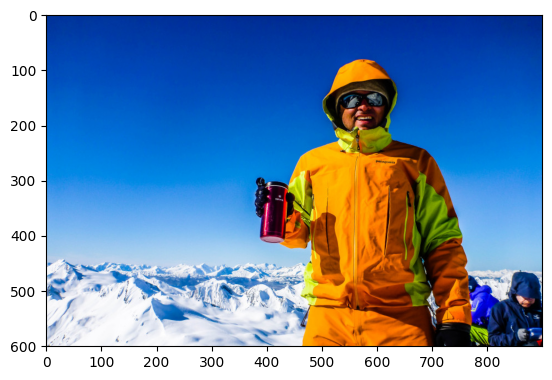

In [82]:
# You can download the image (12345.jpeg) from GitHub: https://github.com/YuxiaoLuo/AI_Intro/tree/main/data
image = plt.imread('data/12345.jpeg')
plt.imshow(image)

In [76]:
# read online image
from PIL import Image
import requests
from io import BytesIO

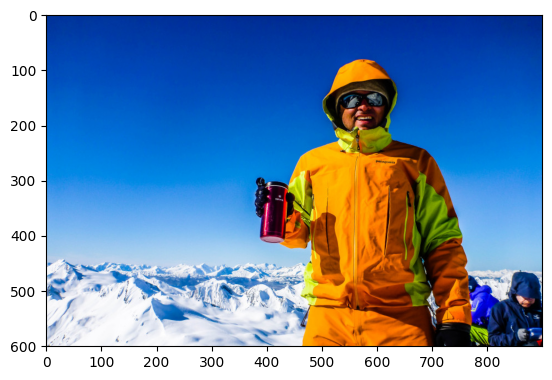

In [83]:
url = 'https://github.com/YuxiaoLuo/AI_Intro/blob/main/data/12345.jpeg?raw=true'

# fetch the image from the url
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# show the image
plt.imshow(image)

### Pre-processing data
- We use `pandas` package for pre-processing tasks. You can find a cheatsheet [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).
- Let's use the `review` data for pre-processing.

In [20]:
import pandas as pd
import numpy as np

1. `head()` shows the top 5 rows

In [4]:
review.head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
2,r0003,6/2/2019,1938,5,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b...",122,positive,0,0,0,0,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN


2. Drop row(s) or column(s)

`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

   1. labels: The labels of the rows or columns to drop.
   2. axis: Specifies whether to drop rows (0) or columns (1).
   3. index: Alternative way to specify row labels to drop.
   4. columns: Alternative way to specify column labels to drop.
   5. inplace: If True, modifies the DataFrame directly. If False (default), returns a new DataFrame with the changes.

In [5]:
# drop the 3rd row
# axis = 0 -> drop row/index
review.drop(2, axis = 0).head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN
5,r0006,5/6/2021,1234,5,Great running jacket,I purchased a similar pullover in the same mat...,79,positive,0,0,0,0,NaN


3. use `list` argument to drop multiple rows

In [15]:
# drop 3rd and 4th rows
review.drop([2,3], axis = 0).head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,0,1,NaN
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,0,1,NaN
5,r0006,5/6/2021,1234,5,Great running jacket,I purchased a similar pullover in the same mat...,79,positive,0,0,0,0,NaN
6,r0007,3/30/2019,2002,5,highly recommended!!,This jacket is super-lightweight but still com...,85,positive,0,0,0,0,NaN


In [17]:
# drop the `Helpful` column (axis =1)
review.drop('Helpful', axis = 1).head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,SalesUp,ReturnsUp,Image
0,r0001,1/12/2020,1714,5,Awesome,The color is a tad greener(turquoise) than it ...,69,positive,0,0,0,NaN
1,r0002,11/27/2019,1760,5,rad jacket.,Awesome winter jacket. Perfect for a wintery d...,18,positive,0,0,1,NaN
2,r0003,6/2/2019,1938,5,A fit that's hard to find,"I am 5'11"" and have a pretty solid, athletic b...",122,positive,0,0,0,NaN
3,r0004,1/17/2019,2074,5,awesome jacket!,this is my new fav jacket. it fits true to siz...,61,positive,2,1,0,12345.jpeg
4,r0005,11/17/2019,1770,3,yeahhuh,"i'm a small person, a very small person, about...",76,negative,0,0,1,NaN


3. Check `null` values

- The `isnull()` method is used to detect missing values in a DataFrame or Series. 
- It returns a `DataFrame` or `Series` of the same shape, where each element is True if the corresponding value is `null` (`NaN`, `None`) and `False` otherwise.

In [18]:
review.isnull().head()

,ReviewID,Date,ElapsedDays,Rating,Title,ReviewText,Length,Sentiment,Votes,Helpful,SalesUp,ReturnsUp,Image
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True


In [19]:
# null value summary for each column
review.isnull().any()

ReviewID       False
Date           False
ElapsedDays    False
Rating         False
Title          False
ReviewText     False
Length         False
Sentiment      False
Votes          False
Helpful        False
SalesUp        False
ReturnsUp      False
Image           True
dtype: bool

In [22]:
# count null values in each column
np.sum(review.isnull())

ReviewID        0
Date            0
ElapsedDays     0
Rating          0
Title           0
ReviewText      0
Length          0
Sentiment       0
Votes           0
Helpful         0
SalesUp         0
ReturnsUp       0
Image          99
dtype: int64

4. Transform variable

- Use `map("var1":value1, "var2":value2)` method
    - "positive" → 1
    - "negative" → 0

In [97]:
review['Sentiment'] = review['Sentiment'].map({"positive":1, "negative":0})
print(review)

   ReviewID        Date  ElapsedDays  Rating  \
0     r0001   1/12/2020         1714       5   
1     r0002  11/27/2019         1760       5   
2     r0003    6/2/2019         1938       5   
3     r0004   1/17/2019         2074       5   
4     r0005  11/17/2019         1770       3   
..      ...         ...          ...     ...   
95    r0096   2/27/2020         1668       2   
96    r0097   2/16/2020         1679       3   
97    r0098   1/27/2020         1699       3   
98    r0099   1/15/2020         1711       5   
99    r0100    1/7/2020         1719       4   

                                 Title  \
0                              Awesome   
1                          rad jacket.   
2            A fit that's hard to find   
3                      awesome jacket!   
4                              yeahhuh   
..                                 ...   
95                Prefer old Gamma AR.   
96                      Way too short!   
97                    Not what I hoped   
98 

5. Deal with string in variables

- Extract Month, Year, Day from Date column
    - Use `df.to_datetime()` method in pandas
    - Use `to_datetime`, `dt.year`,`dt.month`, and `dt.day`

In [114]:
# Convert 'Date' column to datetime format
review['Date'] = pd.to_datetime(review['Date'], errors = 'coerce')

In [115]:
print(review['Date'])

0    2020-01-12
1    2019-11-27
2    2019-06-02
3    2019-01-17
4    2019-11-17
        ...    
95   2020-02-27
96   2020-02-16
97   2020-01-27
98   2020-01-15
99   2020-01-07
Name: Date, Length: 100, dtype: datetime64[ns]


In [119]:
# Extract Year, Month, and Day
review["Year"] = review["Date"].dt.year
review["Month"] = review["Date"].dt.month
review["Day"] = review["Date"].dt.day

In [120]:
review[["Date", "Year", "Month", "Day"]]

,Date,Year,Month,Day
0,2020-01-12,2020,1,12
1,2019-11-27,2019,11,27
2,2019-06-02,2019,6,2
3,2019-01-17,2019,1,17
4,2019-11-17,2019,11,17
...,...,...,...,...
95,2020-02-27,2020,2,27
96,2020-02-16,2020,2,16
97,2020-01-27,2020,1,27
98,2020-01-15,2020,1,15


### Data analysis

#### Summary statistics

In [29]:
# return summary statistics for each column
review.describe()

,ElapsedDays,Rating,Length,Votes,Helpful,SalesUp,ReturnsUp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1718.840000,4.440000,88.500000,0.630000,0.310000,0.310000,0.130000
std,286.796543,0.967346,55.552414,1.252513,0.464823,0.464823,0.337998
min,1234.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,1512.000000,4.000000,49.250000,0.000000,0.000000,0.000000,0.000000
50%,1712.500000,5.000000,77.500000,0.000000,0.000000,0.000000,0.000000
75%,1918.250000,5.000000,122.750000,1.000000,1.000000,1.000000,0.000000
max,2500.000000,5.000000,307.000000,6.000000,1.000000,1.000000,1.000000


Sentiment
negative    Axes(0.125,0.11;0.775x0.77)
positive    Axes(0.125,0.11;0.775x0.77)
dtype: object

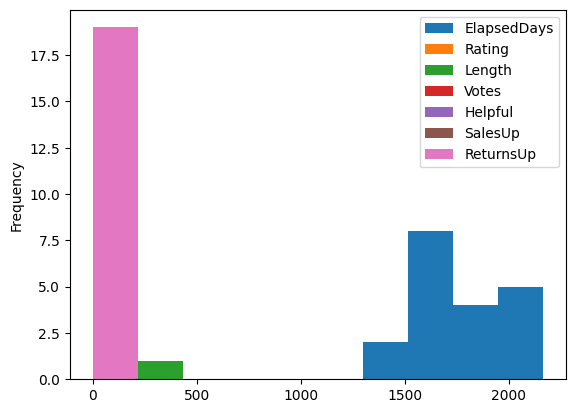

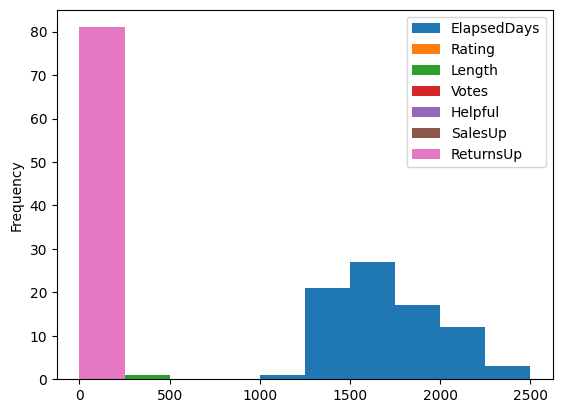

In [55]:
# create a histogram
review.groupby('Sentiment').plot.hist()

#### Text analysis

- use `.split()` to split words in string and generate a list
- use `len()` to count how many words in the list

In [121]:
# Use .assign() method to add new columns for word counts
review = review.assign(
    Title_word_count = review["Title"].apply(lambda x: len(str(x).split())),
    Review_word_count = review["ReviewText"].apply(lambda x: len(str(x).split()))
)

In [125]:
review.iloc[:,-5:]

,Year,Month,Day,Title_word_count,Review_word_count
0,2020,1,12,1,69
1,2019,11,27,2,18
2,2019,6,2,6,121
3,2019,1,17,2,61
4,2019,11,17,1,76
...,...,...,...,...,...
95,2020,2,27,4,188
96,2020,2,16,3,36
97,2020,1,27,4,182
98,2020,1,15,3,156


#### Wordcloud

- use `wordcloud` Python package

In [ ]:
# install wordcloud package
!pip install wordcloud

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

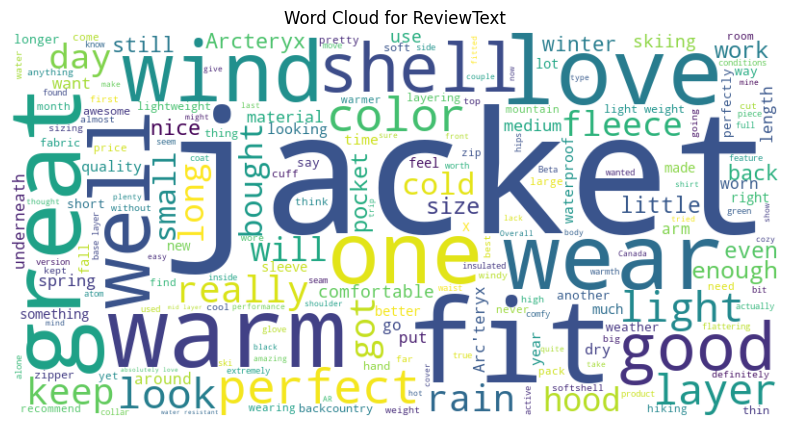

In [136]:
# Combine all review texts into a single string
text = " ".join(str(review) for review in review["ReviewText"].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide the axes
plt.title("Word Cloud for ReviewText")
plt.show()

### Export data

- `DataFrame.to_csv(output_file, index = False)`

In [128]:
# Export to CSV (without index)
export_path = "data/week4_Thu_PythonAnalytics_review data example output.csv"
review.to_csv("data/week4_Thu_PythonAnalytics_review data example output.csv", index=False)

In [130]:
print(f"File saved successfully! You can download it [here]({export_path})")

File saved successfully! You can download it [here](data/week4_Thu_PythonAnalytics_review data example output.csv)


## Sources

- Data downdloaded from: https://github.com/YuxiaoLuo/AI_Intro/tree/main/data